# Assignment 90 - Callback Functions : Kundan Kumar¶

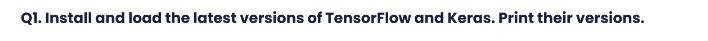

In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf 
import keras
print("Tensorflow Version :" ,tf.__version__)
print("Keras Version :", keras.__version__)

Tensorflow Version : 2.15.0
Keras Version : 2.15.0


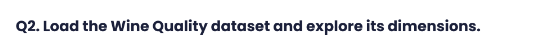

In [3]:
# Dataset link: https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#Load the Wine Quality dataset 
df = pd.read_csv('wine.csv')
df.head()

#Explore the dimensions of the dataset
print("Dataset Dimension :", df.shape)

Dataset Dimension : (1599, 12)


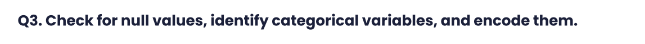

In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [6]:
df.quality.unique()  

array(['bad', 'good'], dtype=object)

In [7]:
#(Quality is categorical , encoding the 'quality' labels to numerical values)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['quality'] = label_encoder.fit_transform(df['quality'])
df.quality.unique()  

array([0, 1])

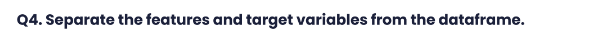

In [8]:
features= df.columns[0:-1]
target = df.columns[-1]

In [9]:
features

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [10]:
target

'quality'

In [11]:
X = df[features]
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [12]:
y = df[target]
y.head()

0    0
1    0
2    0
3    1
4    0
Name: quality, dtype: int64

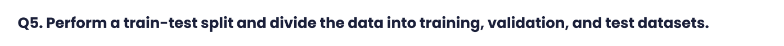

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split


X = df.drop('quality', axis=1)
y = df['quality']

# Split the data into training and temporary data
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

# Split the temporary data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=1)

# Print the shapes of the datasets
print("Training data shape:", X_train.shape, y_train.shape)
print("Validation data shape:", X_val.shape, y_val.shape)
print("Test data shape:", X_test.shape, y_test.shape)

Training data shape: (959, 11) (959,)
Validation data shape: (320, 11) (320,)
Test data shape: (320, 11) (320,)


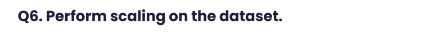

In [18]:
from sklearn.preprocessing import StandardScaler

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

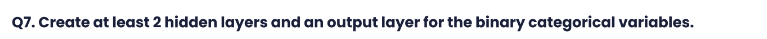

In [19]:
LAYERS = [tf.keras.layers.Flatten(input_shape=(X_train.shape[1],), name="inputLayer"),
          tf.keras.layers.Dense(64, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(32, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(1, activation="sigmoid", name="outputLayer")]


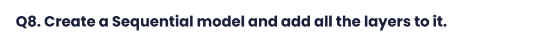

In [20]:
model_clf = tf.keras.models.Sequential(LAYERS)
model_clf.layers

In [21]:
LOSS_FUNCTION = "binary_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "adam" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

In [22]:
model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

In [23]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 11)                0         
                                                                 
 hiddenLayer1 (Dense)        (None, 64)                768       
                                                                 
 hiddenLayer2 (Dense)        (None, 32)                2080      
                                                                 
 outputLayer (Dense)         (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


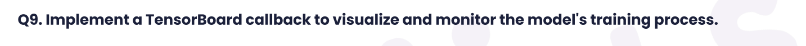

In [26]:
from keras.callbacks import TensorBoard

# Create a TensorBoard callback
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1, write_graph=True, write_images=True)

# Train the model with the TensorBoard callback
history = model_clf.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=20, batch_size=32, callbacks=[tensorboard_callback])

# Evaluate the model on the test data
test_loss, test_acc = model_clf.evaluate(X_test_scaled, y_test)
print(f'Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}')

Epoch 1/20
30/30 [==============================] - 0s 7ms/step - loss: 0.4251 - accuracy: 0.8029 - val_loss: 0.5044 - val_accuracy: 0.7812
Epoch 2/20
30/30 [==============================] - 0s 5ms/step - loss: 0.4224 - accuracy: 0.8040 - val_loss: 0.5021 - val_accuracy: 0.7812
Epoch 3/20
30/30 [==============================] - 0s 6ms/step - loss: 0.4168 - accuracy: 0.8040 - val_loss: 0.5070 - val_accuracy: 0.7844
Epoch 4/20
30/30 [==============================] - 0s 5ms/step - loss: 0.4154 - accuracy: 0.8113 - val_loss: 0.5001 - val_accuracy: 0.7719
Epoch 5/20
30/30 [==============================] - 0s 5ms/step - loss: 0.4115 - accuracy: 0.8081 - val_loss: 0.5033 - val_accuracy: 0.7688
Epoch 6/20
30/30 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8123 - val_loss: 0.5110 - val_accuracy: 0.7844
Epoch 7/20
30/30 [==============================] - 0s 5ms/step - loss: 0.4075 - accuracy: 0.8102 - val_loss: 0.5016 - val_accuracy: 0.7688
Epoch 8/20
30/30 [==

In [ ]:
!tensorboard --logdir=./logs

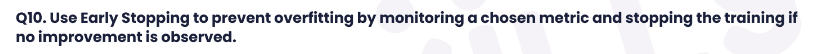

In [29]:
from keras.callbacks import EarlyStopping

# Create an Early Stopping callback
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with the Early Stopping callback
history = model_clf.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=50, batch_size=32, callbacks=[early_stopping_callback])

# Evaluate the model on the test data
test_loss, test_acc = model_clf.evaluate(X_test_scaled, y_test)
print(f'Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}')

Epoch 1/50
30/30 [==============================] - 0s 5ms/step - loss: 0.4811 - accuracy: 0.7748 - val_loss: 0.5281 - val_accuracy: 0.7563
Epoch 2/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4340 - accuracy: 0.8102 - val_loss: 0.5032 - val_accuracy: 0.7688
Epoch 3/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4125 - accuracy: 0.8217 - val_loss: 0.5020 - val_accuracy: 0.7750
Epoch 4/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4059 - accuracy: 0.8206 - val_loss: 0.5047 - val_accuracy: 0.7812
Epoch 5/50
30/30 [==============================] - 0s 3ms/step - loss: 0.3953 - accuracy: 0.8227 - val_loss: 0.4978 - val_accuracy: 0.7750
Epoch 6/50
30/30 [==============================] - 0s 3ms/step - loss: 0.3911 - accuracy: 0.8269 - val_loss: 0.4996 - val_accuracy: 0.7844
Epoch 7/50
30/30 [==============================] - 0s 3ms/step - loss: 0.3857 - accuracy: 0.8321 - val_loss: 0.4995 - val_accuracy: 0.7781
Epoch 8/50
30/30 [==

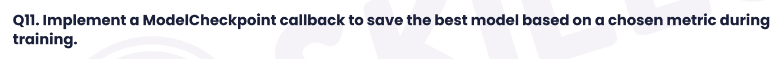

In [31]:
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

# Define the filepath for saving the best model
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, save_weights_only=False, mode='max', verbose=1)

# Train the model with the ModelCheckpoint callback
history = model_clf.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=50, batch_size=32, callbacks=[model_checkpoint])

# Load the best model
best_model = load_model('best_model.h5')

# Evaluate the best model on the test data
test_loss, test_acc = best_model.evaluate(X_test_scaled, y_test)
print(f'\n Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}')

Epoch 1/50
 1/30 [>.............................] - ETA: 0s - loss: 0.2893 - accuracy: 0.8750
Epoch 1: val_accuracy improved from -inf to 0.75937, saving model to best_model.h5
30/30 [==============================] - 0s 6ms/step - loss: 0.2656 - accuracy: 0.8895 - val_loss: 0.5335 - val_accuracy: 0.7594
Epoch 2/50
 1/30 [>.............................] - ETA: 0s - loss: 0.2174 - accuracy: 0.9062
Epoch 2: val_accuracy improved from 0.75937 to 0.76875, saving model to best_model.h5
30/30 [==============================] - 0s 4ms/step - loss: 0.2638 - accuracy: 0.8790 - val_loss: 0.5621 - val_accuracy: 0.7688
Epoch 3/50
 1/30 [>.............................] - ETA: 0s - loss: 0.2701 - accuracy: 0.8438

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: val_accuracy did not improve from 0.76875
30/30 [==============================] - 0s 3ms/step - loss: 0.2641 - accuracy: 0.8895 - val_loss: 0.5372 - val_accuracy: 0.7563
Epoch 4/50
 1/30 [>.............................] - ETA: 0s - loss: 0.2080 - accuracy: 0.9375
Epoch 4: val_accuracy did not improve from 0.76875
30/30 [==============================] - 0s 3ms/step - loss: 0.2581 - accuracy: 0.8936 - val_loss: 0.5430 - val_accuracy: 0.7656
Epoch 5/50
 1/30 [>.............................] - ETA: 0s - loss: 0.1559 - accuracy: 1.0000
Epoch 5: val_accuracy did not improve from 0.76875
30/30 [==============================] - 0s 3ms/step - loss: 0.2608 - accuracy: 0.8957 - val_loss: 0.5462 - val_accuracy: 0.7688
Epoch 6/50
 1/30 [>.............................] - ETA: 0s - loss: 0.2974 - accuracy: 0.9062
Epoch 6: val_accuracy did not improve from 0.76875
30/30 [==============================] - 0s 3ms/step - loss: 0.2568 - accuracy: 0.8905 - val_loss: 0.5266 - val_accuracy: 0.76

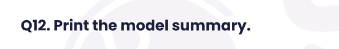

In [33]:
print(model_clf.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 11)                0         
                                                                 
 hiddenLayer1 (Dense)        (None, 64)                768       
                                                                 
 hiddenLayer2 (Dense)        (None, 32)                2080      
                                                                 
 outputLayer (Dense)         (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


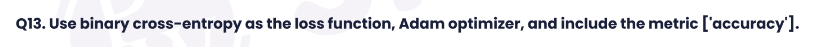

In [34]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy

loss_function = BinaryCrossentropy() 
optimizer=Adam(learning_rate=0.001)
acc = Accuracy()

# model.compile(loss=loss_function, optimizer=optimizer, metrics=[acc])

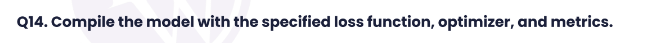

In [36]:
# Compile the model
model_clf.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

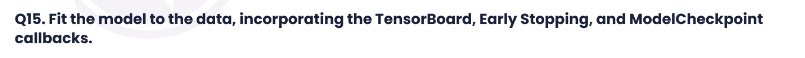

In [37]:
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint

# Define callback instances
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)
early_stopping_callback = EarlyStopping(patience=5, monitor='val_loss', restore_best_weights=True)
model_checkpoint_callback = ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)

# Fit the model with callbacks
history = model_clf.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val),
                    epochs=50, batch_size=32,
                    callbacks=[tensorboard_callback, early_stopping_callback, model_checkpoint_callback])

# Load the best model
best_model = load_model('best_model.h5')

# Evaluate the best model on the test data
test_loss, test_acc = best_model.evaluate(X_test_scaled, y_test)
print(f'\n Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}')

Epoch 1/50
30/30 [==============================] - 1s 11ms/step - loss: 0.1920 - accuracy: 0.9270 - val_loss: 0.5745 - val_accuracy: 0.7875
Epoch 2/50
30/30 [==============================] - 0s 5ms/step - loss: 0.1856 - accuracy: 0.9270 - val_loss: 0.6039 - val_accuracy: 0.7750
Epoch 3/50
30/30 [==============================] - 0s 5ms/step - loss: 0.1862 - accuracy: 0.9260 - val_loss: 0.6072 - val_accuracy: 0.7688
Epoch 4/50
30/30 [==============================] - 0s 5ms/step - loss: 0.1843 - accuracy: 0.9291 - val_loss: 0.6032 - val_accuracy: 0.7688
Epoch 5/50
30/30 [==============================] - 0s 5ms/step - loss: 0.1818 - accuracy: 0.9353 - val_loss: 0.6038 - val_accuracy: 0.7750
Epoch 6/50
10/10 [==============================] - 0s 2ms/step - loss: 0.5199 - accuracy: 0.7750

 Test loss: 0.5199, Test accuracy: 0.7750


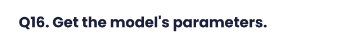

In [38]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 11)                0         
                                                                 
 hiddenLayer1 (Dense)        (None, 64)                768       
                                                                 
 hiddenLayer2 (Dense)        (None, 32)                2080      
                                                                 
 outputLayer (Dense)         (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


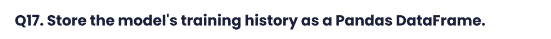

In [39]:
import pandas as pd

# Convert the history dictionary to a DataFrame
history_df = pd.DataFrame(history.history)

# Display the DataFrame
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.191983,0.927007,0.574513,0.78750
1,0.185564,0.927007,0.603855,0.77500
2,0.186229,0.925965,0.607246,0.76875
3,0.184254,0.929093,0.603246,0.76875
4,0.181828,0.935349,0.603763,0.77500
5,0.183312,0.933264,0.590703,0.78125


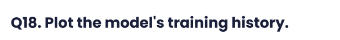

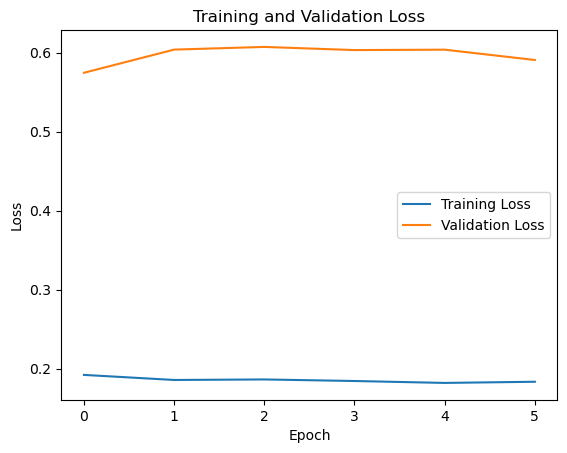

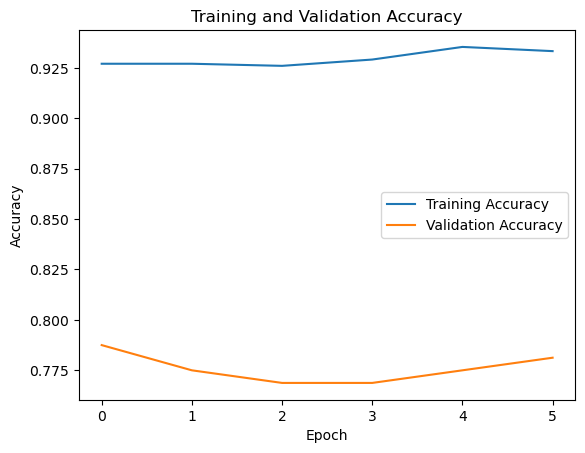

In [40]:
import matplotlib.pyplot as plt

# Plot training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot training accuracy and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

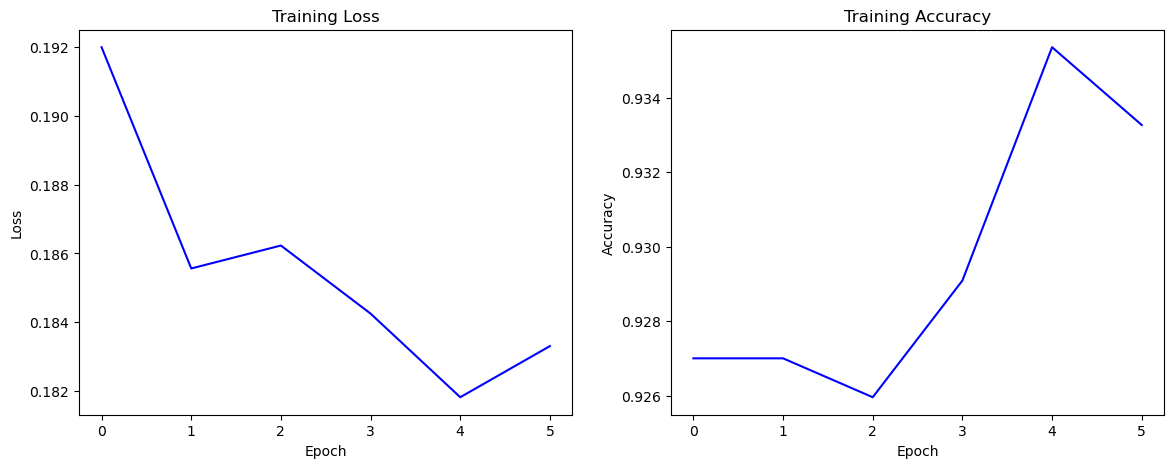

In [41]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], color='b' )
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], color='b')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.show()

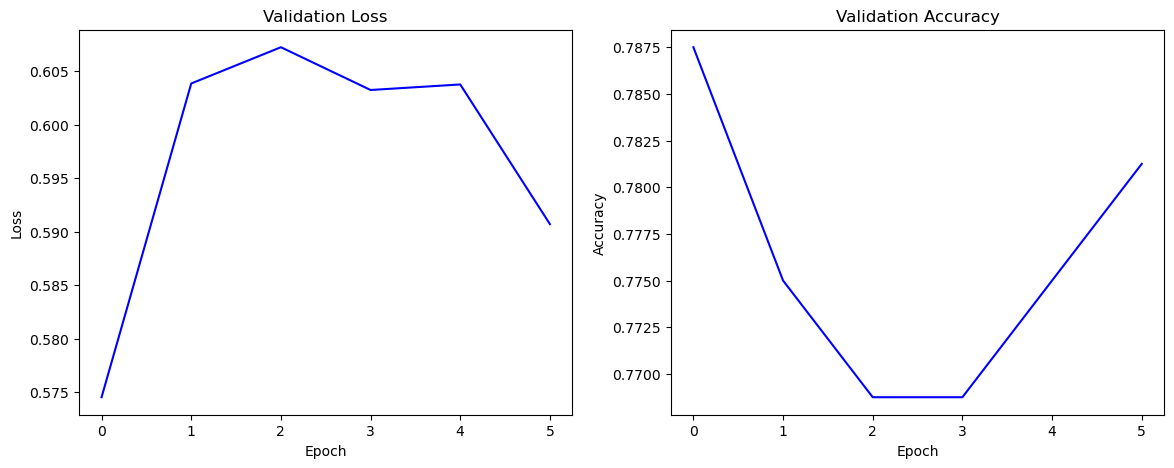

In [42]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['val_loss'], color='b' )
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss')

plt.subplot(1,2,2)
plt.plot(history.history['val_accuracy'], color='b')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.show()

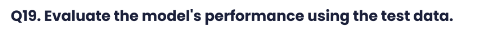

In [43]:
test_loss, test_accuracy = model_clf.evaluate(X_test_scaled, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.5199 - accuracy: 0.7750


In [44]:
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Test Loss: 0.5198501348495483
Test Accuracy: 0.7749999761581421
